# Quantitative Easing and Tapering
In response to the financial crisis of 2008, since March 2009 the Fed has been playing an active role in buying large quantities of federal debt and mortgage bonds and holding them on its books thereby increasing the monetary base (each purchase triggering an increase in reserve balances) and applying downward pressure on long-term interest rates. This process has become known as _quantitiative easing_. As a result, the percentage of US federal debt held by US federal reserve banks increased from about 8% in 2007 to a whopping 20.8% in 2021.

Since June 2022 the Fed has embarked on a tapering exercise whereby it allowed upto $30 billion in Treasury and $17.5 billion in mortgage bonds to mature every month without reinvesting the proceeds (a passive _runoff_, aka quantitative tightening). Each maturing bond whose notional the Fed is not reinvesting decreases the amount of reserves and hence the monetary base. fIn September 2022 the Fed increased the runoff to upto $60 billion in Treasuries and $30 billion in mortgage bonds.

In this notebook I examine the composition of securities held outright by the Fed as well its speed of increasing or decreasing them (in Billions per month).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from datetime import date

In [2]:
report_start = date.fromisoformat('2008-10-01')
report_end = date.today()

# Limit the display of dataframes to 25 rows max
pd.options.display.max_rows = 25

# Indicate representation in Billions
pd.options.display.float_format = '${:,.2f}bn'.format

I use the following dataseries provided by [FRED](https://fred.stlouisfed.org) for this analysis:
* `WSHOTSL` &mdash; Assets: Securities Held Outright: U.S. Treasury Securities: Wednesday Level (weekly frequency)
* `WSHOMCB` &mdash; Assets: Securities Held Outright: Mortgage-Backed Securities: Wednesday Level (weekly frequency)
* `WSHOFADSL` &mdash; Assets: Securities Held Outright: Federal Agency Debt Securities: Wednesday Level (weekly frequency)

**NB:** These data series return the face value of these securities. The unamortied differences between the face value and the purchase price is held in the _Unamortized premiums on securities held outright_ and _Unamortized discounts on securities held outright_ accounts (which can be obtained from the `WUPSHO` and `WUDSHO` series respectively).

In [3]:
sec_held_outright = web.get_data_fred(['WSHOTSL', 'WSHOMCB', 'WSHOFADSL'],
                                      start=report_start, end=report_end).asfreq('W-Wed')

# Converting into billions of USD
sec_held_outright /= 1000.

In [4]:
sec_held_outright.rename(
    columns={'WSHOTSL': 'US Treasury Securities',
             'WSHOMCB': 'Mortgage-Backed Securities', 'WSHOFADSL': 'Federal Agency Debt Securities'},
    inplace=True)

In [5]:
SEC_HELD_OUTRIGHT_COMPOSITION_TITLE = 'Federal Reserve Banks: Securities held outright (at face value)'
SEC_HELD_OUTRIGHT_SPEED = 'Speed of Quantitative Easing or Tapering in Billions of USD per month'
SEC_HELD_OUTRIGHT_SPEED_MA = 'Speed of Quantitative Easing or Tapering in Billions of USD per month (moving average over one quarter)'
LEFT_Y_AXIS_LABEL = 'Billions of USD'
LEFT_Y_AXIS_LABEL_SPEED = 'Billions of USD per Month'

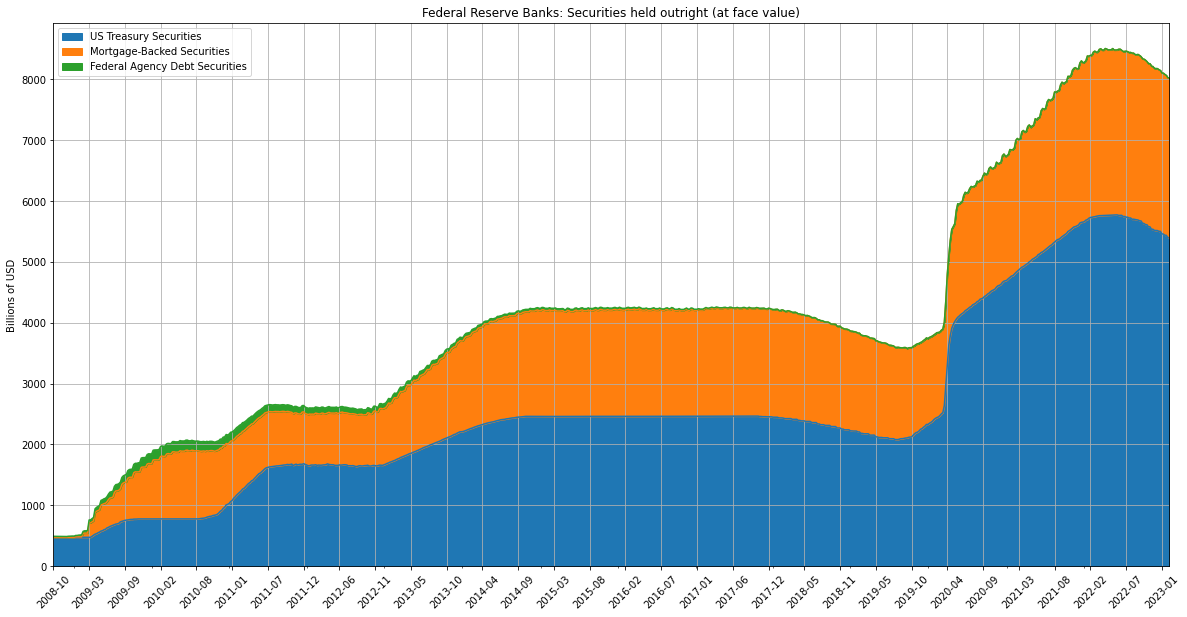

In [6]:
ax = sec_held_outright.plot.area(figsize=(20,10), grid=True, title=SEC_HELD_OUTRIGHT_COMPOSITION_TITLE,
                          xticks=sec_held_outright.index[::24], xlabel='', rot=45,
                          ylabel=LEFT_Y_AXIS_LABEL) #, yticks=np.arange(0, 25e3, 2.5e3))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright.index[::24])))

In [7]:
# Resampling to month start
sec_held_outright = sec_held_outright.resample('MS').mean()

In [8]:
sec_held_outright

,US Treasury Securities,Mortgage-Backed Securities,Federal Agency Debt Securities
DATE,,,
2008-10-01,$476.55bn,$0.00bn,$14.09bn
2008-11-01,$476.43bn,$0.00bn,$12.73bn
2008-12-01,$476.13bn,$0.00bn,$17.12bn
2009-01-01,$475.42bn,$4.75bn,$23.98bn
2009-02-01,$474.81bn,$37.20bn,$33.49bn
...,...,...,...
2022-10-01,"$5,621.11bn","$2,693.37bn",$2.35bn
2022-11-01,"$5,547.31bn","$2,672.95bn",$2.35bn
2022-12-01,"$5,507.53bn","$2,653.00bn",$2.35bn


### Measuring the speed of quantitative easing/tapering in Billions of USD per month

In [9]:
sec_held_outright_speed = (sec_held_outright - sec_held_outright.shift(1)).dropna()

In [10]:
sec_held_outright_speed.loc['2020-01':, sec_held_outright_speed.columns[:2]].tail(12)

,US Treasury Securities,Mortgage-Backed Securities
DATE,,
2022-03-01,$20.89bn,$27.29bn
2022-04-01,$6.55bn,$11.98bn
2022-05-01,$4.78bn,$-7.48bn
2022-06-01,$-0.89bn,$-1.71bn
2022-07-01,$-27.17bn,$-0.54bn
2022-08-01,$-32.37bn,$3.98bn
2022-09-01,$-26.01bn,$-9.34bn
2022-10-01,$-59.77bn,$-16.84bn
2022-11-01,$-73.80bn,$-20.42bn


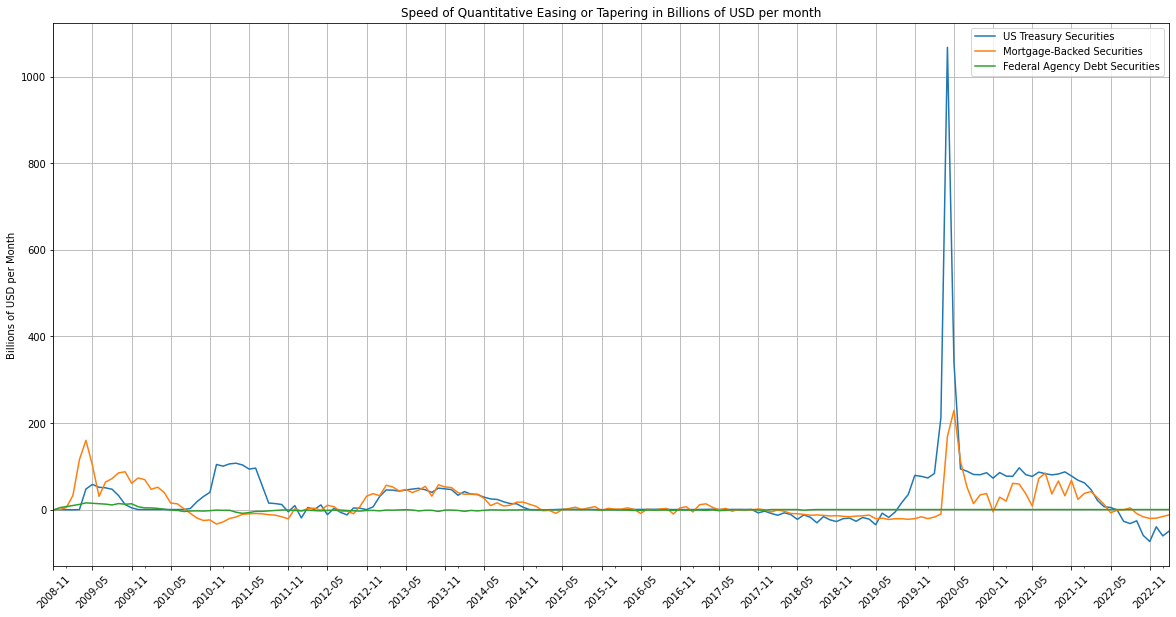

In [11]:
ax = sec_held_outright_speed.plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED,
                            xticks=sec_held_outright_speed.index[::6], xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED)#, yticks=np.arange(-30, 21, 5))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed.index[::6])))

##### Limiting the range of the Y axis for better display

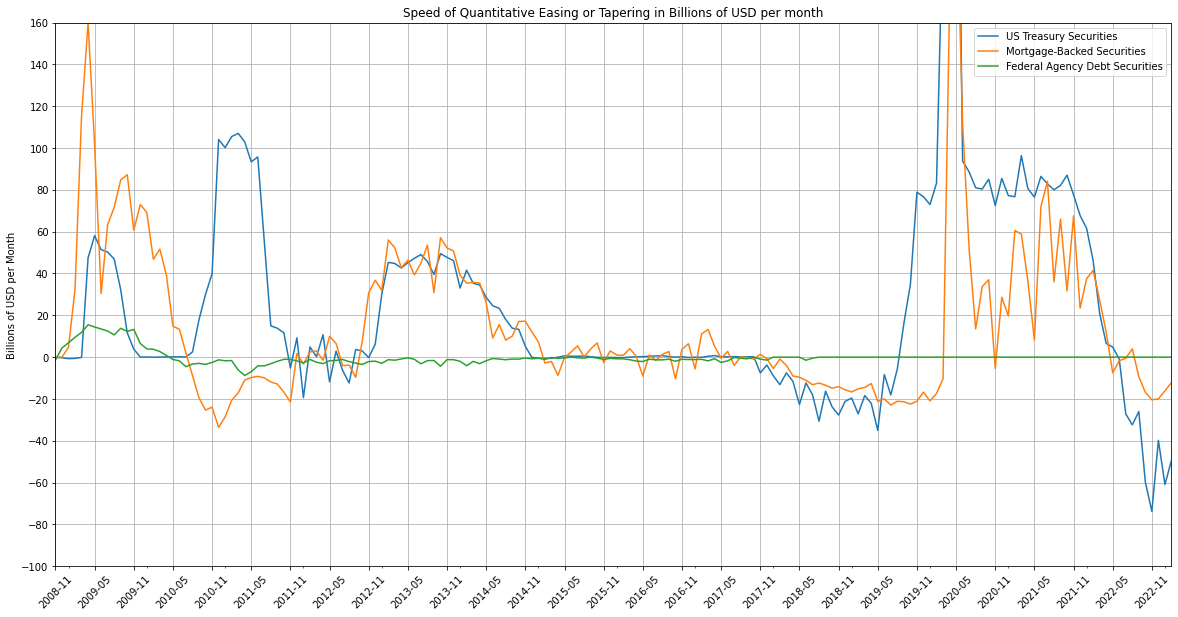

In [12]:
ax = sec_held_outright_speed.plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED,
                            xticks=sec_held_outright_speed.index[::6], xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED, ylim=(-100, 160), yticks=np.arange(-100, 161, 20))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed.index[::6])))

#### Zomming in on the last two years

In [13]:
sec_held_outright_speed_short = sec_held_outright_speed.loc['2021':]

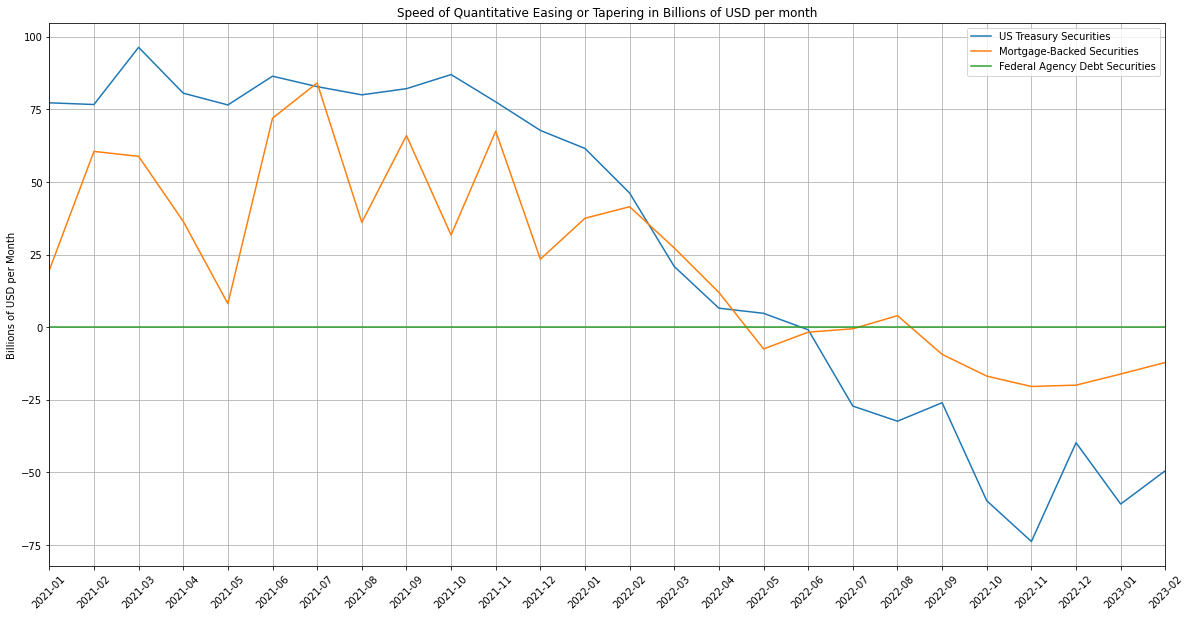

In [14]:
ax = sec_held_outright_speed_short.plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED,
                            xticks=sec_held_outright_speed_short.index, xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED)#, ylim=(-100, 200), yticks=np.arange(-100, 200, 20))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed_short.index)))

#### Measuring the speed of quantitative easing/tapering in Billions of USD/month represented as a moving average over one quarter

In [15]:
sec_held_outright_speed_ma = sec_held_outright_speed.rolling(3).mean().dropna()

In [16]:
sec_held_outright_speed_ma.loc['2020-01':, sec_held_outright_speed_ma.columns[:2]]

,US Treasury Securities,Mortgage-Backed Securities
DATE,,
2020-01-01,$76.20bn,$-19.58bn
2020-02-01,$77.63bn,$-18.36bn
2020-03-01,$122.77bn,$-16.24bn
2020-04-01,$454.36bn,$47.01bn
2020-05-01,$540.00bn,$129.22bn
...,...,...
2022-10-01,$-39.39bn,$-7.40bn
2022-11-01,$-53.20bn,$-15.53bn
2022-12-01,$-57.79bn,$-19.07bn


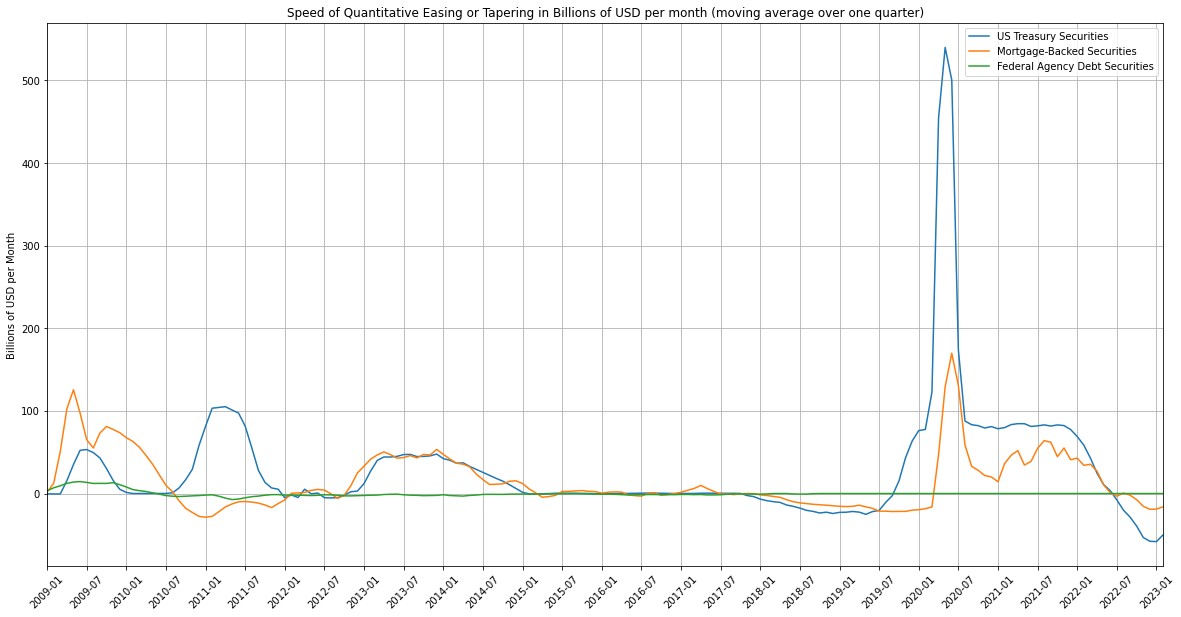

In [17]:
ax = sec_held_outright_speed_ma.plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED_MA,
                            xticks=sec_held_outright_speed_ma.index[::6], xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED)#, yticks=np.arange(-30, 21, 5))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed_ma.index[::6])))

##### Limiting the range of the Y axis for better display.

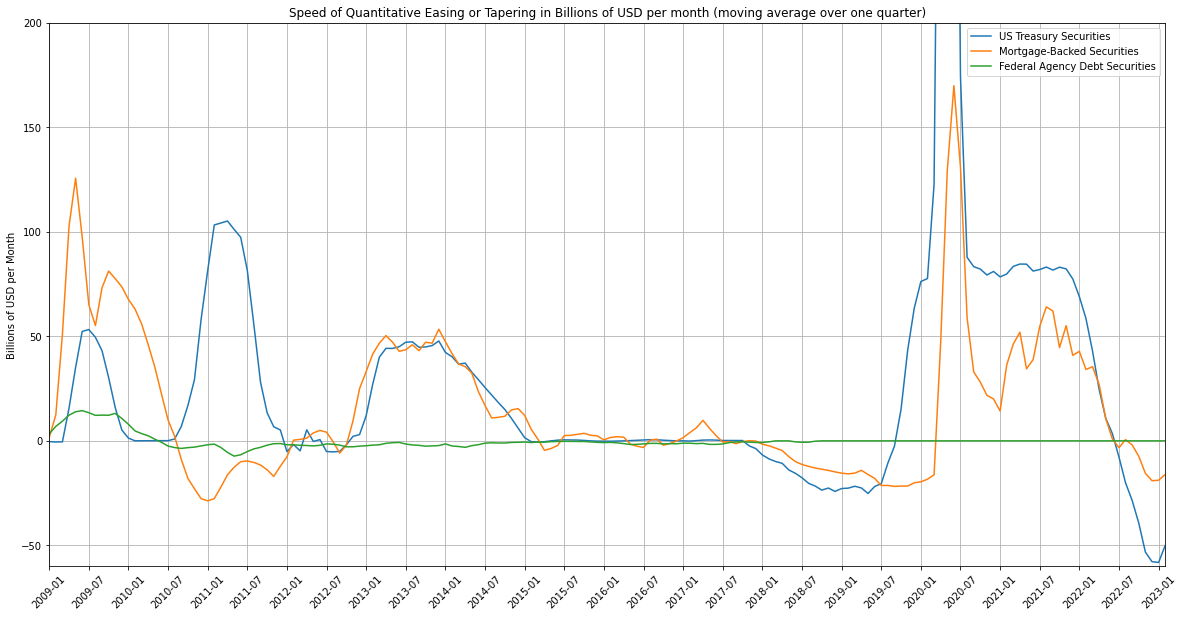

In [18]:
ax = sec_held_outright_speed_ma.plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED_MA,
                            xticks=sec_held_outright_speed_ma.index[::6], xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED, ylim=(-60, 200))#, yticks=np.arange(-30, 21, 5))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed_ma.index[::6])))

#### Zomming in on the last two years

In [19]:
sec_held_outright_speed_ma_short = sec_held_outright_speed_ma.loc['2021':]

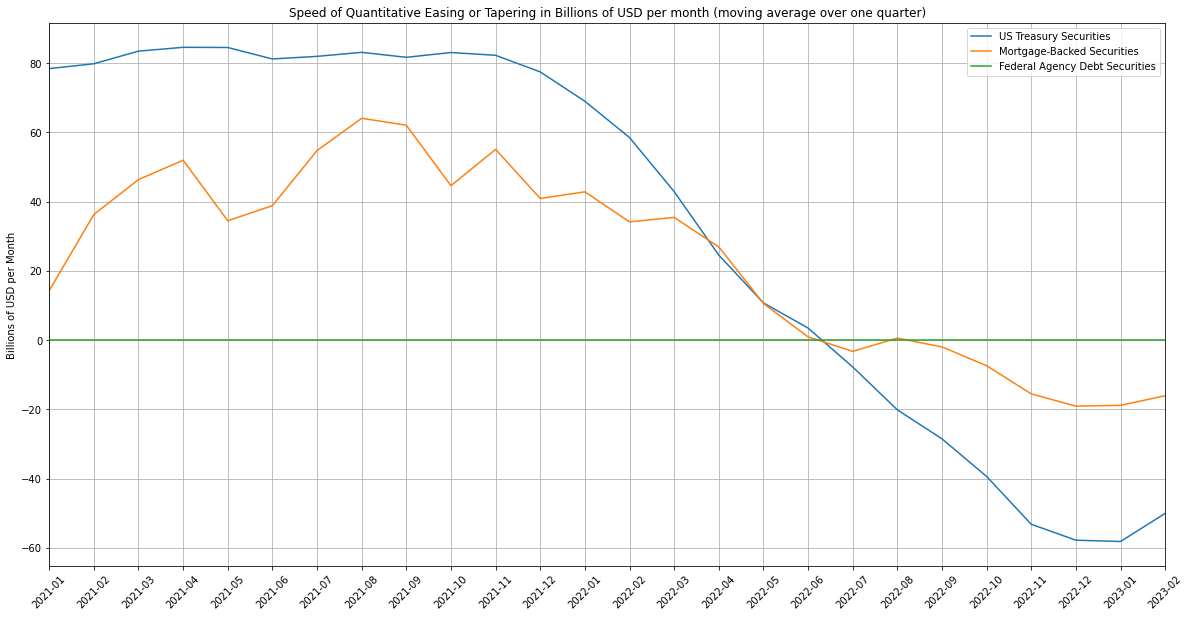

In [20]:
ax = sec_held_outright_speed_ma_short.plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED_MA,
                            xticks=sec_held_outright_speed_ma_short.index, xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed_ma_short.index)))